## Tier 1. Module 3: Basic Algorithms and Data Structures

## Topic 6 - Graphs

## Homework

### Task 1


Create a graph using the networkX library to model a specific real-world network (eg, a city's transportation network, a social network, an Internet topology).

Visualize the created graph, analyze the main characteristics (for example, the number of vertices and edges, degree of vertices).

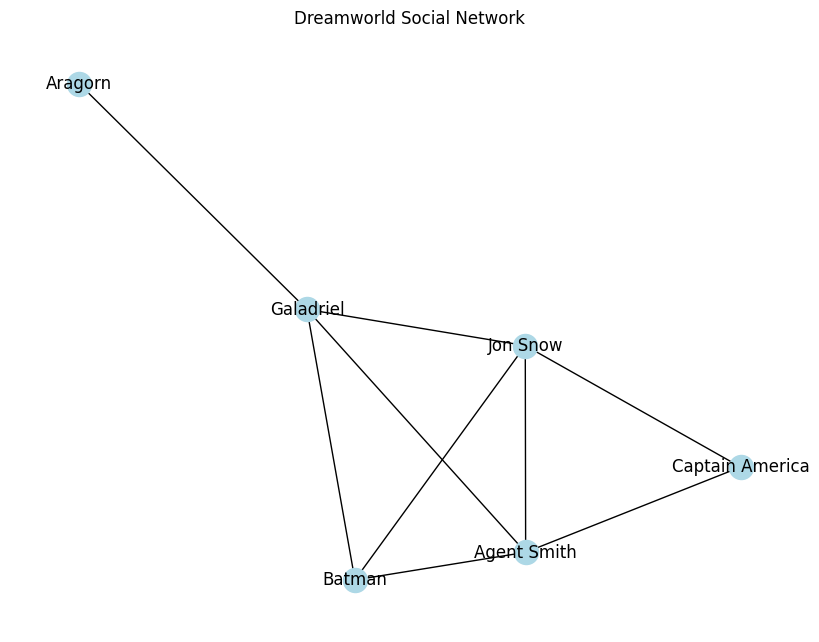

Number of nodes: 6
Number of edges: 9
Vertex degrees: [('Jon Snow', 4), ('Captain America', 2), ('Galadriel', 4), ('Agent Smith', 4), ('Aragorn', 1), ('Batman', 3)]


In [12]:
import networkx as nx
import matplotlib.pyplot as plt

social_network = nx.Graph()

users = ["Jon Snow", "Captain America", "Galadriel", "Agent Smith", "Aragorn", "Batman"]
social_network.add_nodes_from(users)

relationships = [
    (users[0], users[1]),
    (users[0], users[2]),
    (users[0], users[3]),
    (users[1], users[3]),
    (users[2], users[3]),
    (users[2], users[4]),
    (users[0], users[5]),
    (users[2], users[5]),
    (users[3], users[5]),
]
social_network.add_edges_from(relationships)

plt.figure(figsize=(8, 6))
nx.draw(
    social_network,
    with_labels=True,
    node_color="lightblue",
    font_size=12,
    font_weight="normal",
)
plt.title("Dreamworld Social Network")
plt.show()

print("Number of nodes:", social_network.number_of_nodes())
print("Number of edges:", social_network.number_of_edges())
print("Vertex degrees:", social_network.degree())

### Task 2


Write a program that uses the DFS and BFS algorithms to find paths in the graph that was developed in the first exercise.

Next, compare the results of both algorithms for this graph, highlighting the difference in the resulting paths. Explain why the paths for algorithms are as they are.

#### 2.1 - DFS algorithm


In [79]:
def dfs_paths(graph: nx.graph, start: str) -> dict:
    visited = set()
    paths = {}

    def dfs_util(node, path):
        visited.add(node)
        path.append(node)
        paths[node] = path[:]

        for neighbor in graph.neighbors(node):
            if neighbor not in visited:
                dfs_util(neighbor, path[:])

    dfs_util(start, [])
    return paths

#### 2.2 - BFS algorithm


In [80]:
def bfs_paths(graph: nx.Graph, start: str) -> dict:
    queue = [(start, [start])]
    visited = set()
    paths = {}
    
    while queue:
        (node, path) = queue.pop(0)
        visited.add(node)
        paths[node] = path[:]
        
        for neighbor in graph.neighbors(node):
            if neighbor not in visited:
                queue.append((neighbor, path + [neighbor]))
                visited.add(neighbor)
    
    return paths

#### 2.3 - Paths finding


In [81]:
selected_user = "Aragorn"
dfs_result = dfs_paths(social_network, selected_user)
bfs_result = bfs_paths(social_network, selected_user)

print("DFS paths from vertex", selected_user, ":")
for vertex, path in dfs_result.items():
    if vertex != selected_user:
        print(f"To vertex {vertex}: {path}")

print("\nBFS paths from vertex", selected_user, ":")
for vertex, path in bfs_result.items():
    if vertex != selected_user:
        print(f"To vertex {vertex}: {path}")

DFS paths from vertex Aragorn :
To vertex Galadriel: ['Aragorn', 'Galadriel']
To vertex Jon Snow: ['Aragorn', 'Galadriel', 'Jon Snow']
To vertex Captain America: ['Aragorn', 'Galadriel', 'Jon Snow', 'Captain America']
To vertex Agent Smith: ['Aragorn', 'Galadriel', 'Jon Snow', 'Captain America', 'Agent Smith']
To vertex Batman: ['Aragorn', 'Galadriel', 'Jon Snow', 'Captain America', 'Agent Smith', 'Batman']

BFS paths from vertex Aragorn :
To vertex Galadriel: ['Aragorn', 'Galadriel']
To vertex Jon Snow: ['Aragorn', 'Galadriel', 'Jon Snow']
To vertex Agent Smith: ['Aragorn', 'Galadriel', 'Agent Smith']
To vertex Batman: ['Aragorn', 'Galadriel', 'Batman']
To vertex Captain America: ['Aragorn', 'Galadriel', 'Jon Snow', 'Captain America']


#### Conclusions:


The paths obtained using BFS turned out to be more optimal (shorter) than the paths obtained using DFS. This can be explained by the fact that BFS works on a queue (FIFO) basis, so the nearest nodes are explored first before delving deeper into the graph. Instead, DFS works recursively (or using stack (LIFO)) by visiting each next neighboring vertex until the algorithm encounters a vertex whose neighbors have already been visited, only then does DFS go back and continue the process from vertices that have been added but not visited earlier, until all vertices are visited.

### Task 3


Implement Dijkstra's algorithm for finding the shortest path in the designed graph: add weights to the edges in the graph and find the shortest path between all vertices of the graph.

#### 3.1 - Dijkstra algorithm


In [73]:
def dijkstra(graph: nx.Graph, start: str) -> dict:
    distances = {vertex: float("infinity") for vertex in graph.nodes()}
    distances[start] = 0
    unvisited = list(graph.nodes())
    visited = []

    while unvisited:
        current_vertex = min(unvisited, key=lambda vertex: distances[vertex])

        if distances[current_vertex] == float("infinity"):
            break

        for neighbor, weight in graph[current_vertex].items():
            distance = distances[current_vertex] + weight["weight"]
            if distance < distances[neighbor]:
                distances[neighbor] = distance

        visited.append(current_vertex)
        unvisited.remove(current_vertex)

        sorted_distances = dict(sorted(distances.items(), key=lambda item: item[1]))

    return sorted_distances

#### 3.2 - Adding weights


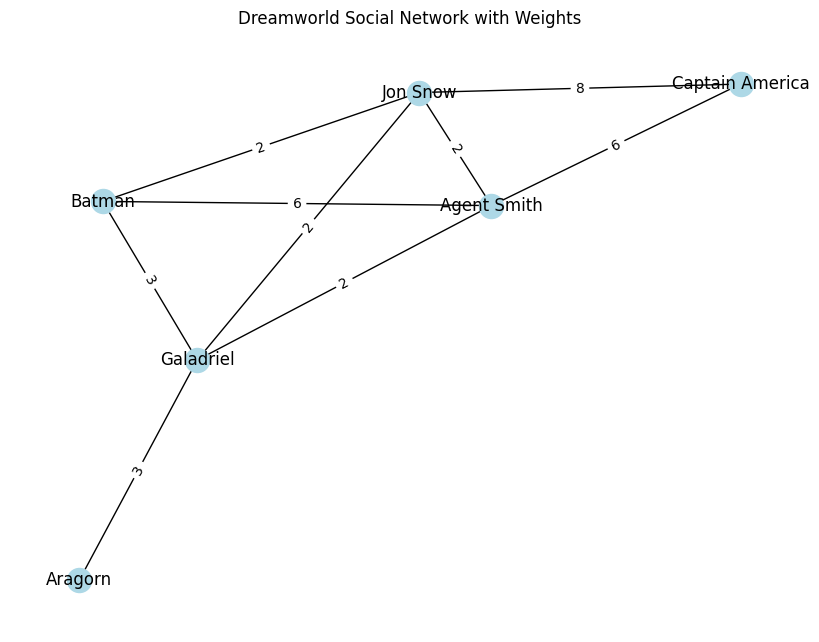

In [54]:
import random

for edge in social_network.edges():
    social_network[edge[0]][edge[1]]["weight"] = random.randint(2, 8)


plt.figure(figsize=(8, 6))
pos = nx.spring_layout(social_network)
nx.draw(
    social_network,
    pos,
    with_labels=True,
    node_color="lightblue",
    font_size=12,
    font_weight="normal",
)

labels = nx.get_edge_attributes(social_network, "weight")
nx.draw_networkx_edge_labels(social_network, pos, edge_labels=labels)
plt.title("Dreamworld Social Network with Weights")
plt.show()

#### 3.3 - Shortest paths between all vertices


In [76]:
starting_user = "Aragorn"
distances = dijkstra(social_network, starting_user)

print("*** Shortest paths between all users of the social network ***")
for user, distance in distances.items():
    print(f"From {starting_user} to {user:<16}-> {distance}")

*** Shortest paths between all users of the social network ***
From Aragorn to Aragorn         -> 0
From Aragorn to Galadriel       -> 3
From Aragorn to Jon Snow        -> 5
From Aragorn to Agent Smith     -> 5
From Aragorn to Batman          -> 6
From Aragorn to Captain America -> 11
